# Lesson 05: Neural Networks as Code

- Adapted from: https://gitlab.com/wdeback/dl-keras-tutorial

Despite all the recent excitement around deep learning, neural networks have a somewhat deserved reputation among non-specialists, who view them as computationally intensive to train and apply, difficult to interpret, and tedious to build.

While interpretability remains an issue, and you're going to want access to some pretty serious hardware to train and deploy large networks, the process of building and experimenting with neural networks has gotten a lot easier recently.

That's because there are now _high-level_ neural network libraries that enable developers to quickly build neural network models without worrying about the numerical details of floating point operations, tensor algebra and GPU programming.

Today we're going to look at one of these libraries, _Keras_. Keras is a high-level neural network library that, among many other things, wraps an API similar to scikit-learn's around powerful backends like MXNet, Theano or TensorFlow backends. Over the years, the `keras` API has become so popular, that it is by now the go-to API for tensorflow itself.

Because of that similarity with _scikit-learn_, and to emphasize that neural network design and testing is now accessible to everyone, I'm going to give you a quick tutorial on how to use Keras.

Let's get started by importing the libraries we'll need: scikit-learn, Keras and some plotting features.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns # nice plotting
import pandas as pd # data frames
plt.style.use('dark_background')

# scikit-learn
from sklearn.model_selection import train_test_split

# using keras that is shipped with tensorflow today
from tensorflow import keras 
from tensorflow import random as tf_random

In [2]:
import numpy as np
import tensorflow as tf
import random as python_random

# The below is necessary for starting Numpy generated random numbers
# in a well-defined initial state.
np.random.seed(20210303)

# The below is necessary for starting core Python generated random numbers
# in a well-defined state.
python_random.seed(20210303)

# The below set_seed() will make random number generation
# in the TensorFlow backend have a well-defined initial state.
# For further details, see:
# https://www.tensorflow.org/api_docs/python/tf/random/set_seed
tf_random.set_seed(20210304)

# Penguins data (again)


In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")

#clear NaN values
df = df.dropna()

#come up with categories
df[["species_"]] = df.species.astype("category")

#prepare binary classification
df[["is_adelie"]] = (df.species_.cat.codes < 1).astype(np.int8)

print(df.dtypes)

species                object
island                 object
bill_length_mm        float64
bill_depth_mm         float64
flipper_length_mm     float64
body_mass_g           float64
sex                    object
year                    int64
species_             category
is_adelie                int8
dtype: object


/home/steinbac/software/miniconda/envs/keras-cpu/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/steinbac/software/miniconda/envs/keras-cpu/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/steinbac/software/miniconda/envs/keras-cpu/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


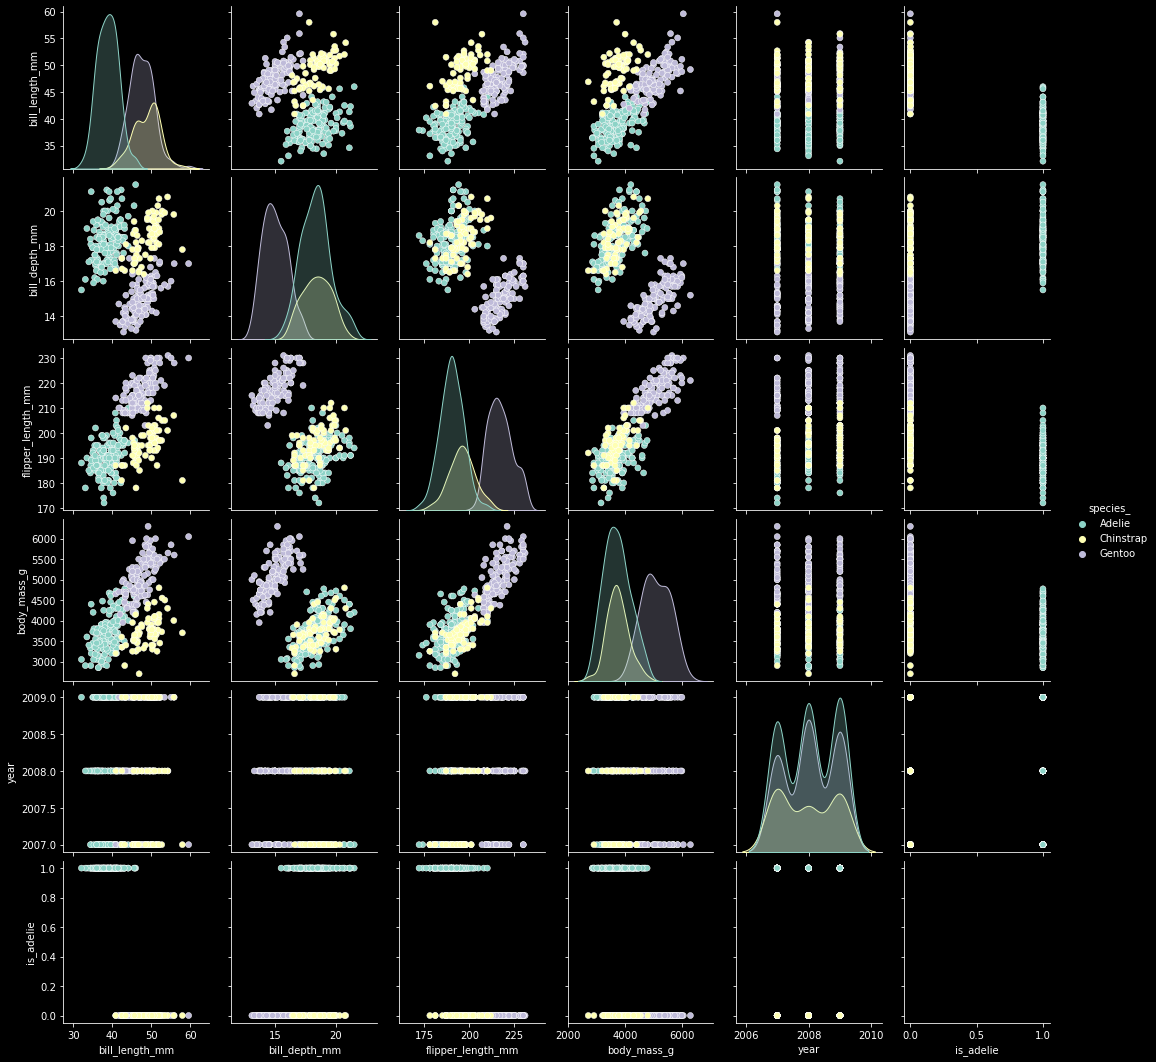

In [4]:
sns.pairplot(data=df, hue='species_');

# Munge and split the data for training and testing

First we need to pull the raw data out of the `penguins` dataframe. We'll hold the flipper and bill features in an array `X` and the species labels in a corresponding array `y`.

In [5]:
X = df[['flipper_length_mm', 'bill_depth_mm', 'bill_length_mm']].values
y = df.is_adelie.values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

As is standard in supervised machine learning, we'll train with some of the data, and measure the performance of our model with the remainder. This is simple to do by hand, but is also built into scikit-learn as the `train_test_split()` function.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=20210301)

print(X_train.shape)
print(X_test.shape)

(299, 3)
(34, 3)


# Now let's dive into Keras

In [7]:
from keras.layers import Input, Dense, Activation
from keras.utils import np_utils

Keras is a high-level neural network library created by [François Chollet](https://twitter.com/fchollet) at Google. The initial commit to its public Github repository was March 27, 2015.
As we just saw, scikit-learn makes building a classifier very simple:
 - one line to instantiate the classifier
 - one line to train it
 - and one line to measure its performance
 
Building a classifier is only a little bit more complicated in Keras. The data-munging changes a little bit, and we have to do some work to define the network before we instantiate it as a classifier, but otherwise it's very similar to working with scikit-learn.


`keras` requires that labels be one-hot-encoded. This means we need to convert data that looks like
```
Adelie
Chinstrap
Adelie
Gentoo
...
```

to a table that looks like

```
Adelie  Chinstrap    Gentoo
     1          0         0
     0          1         0
     1          0         0
     0          0         1
```

There are lots of ways of doing this. If you're a pandas person then there's `pandas.get_dummies()`, and one-hot-encoding is in scikit-learn. We'll just use a Keras utility and some numpy.

In our case, this would translate to ...

In [8]:
def one_hot_encode(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

y_train_ohe = one_hot_encode(y_train)
y_test_ohe = one_hot_encode(y_test)

print("before")
print(y_test[:5,...])

print()
print("after")
print(y_test_ohe[:5,...])

before
[0 0 1 0 0]

after
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


# Build the neural network model

Aside from the data munging required in this particular case, the most signifcant and important difference with working with Keras is that you have to specify the structure of the model before you can instantiate and use it.

In scikit-learn, the models are off-the-shelf. But Keras is a neural network library. As such, while the number of features/classes in your data provide constraints, you can determine all the other aspects of model structure: number of layers, size of layers, the nature of the connections between the layers, etc. (And if that didn't make sense, Keras is a great way to experiment with it!)

The upshot of this freedom is that instaniating a minimal classifier involves a bit more work than the one line required by scikit-learn.


## Multi-Layer Perceptron

- for the penguins dataset, we have a dataset of $\vec{x} \el \mathbf{R}^3$
- we want to predict if a given penguin is of `Adelie` or note
- our one-hot encoded output is of type $\vec{y} \el \mathbf{R}^2$
- origins date back to [1943](https://en.wikipedia.org/wiki/History_of_artificial_neural_networks)


![A feedforward network](https://raw.githubusercontent.com/deeplearning540/lesson05/main/images/ann-p1_600px.png)

- the first layer is the input layer
- the middle layer is called hidden layer
- last layer marks the output

![Activations](https://raw.githubusercontent.com/deeplearning540/lesson05/main/images/ann-p3_600px.png)

- (non-linear) activations are needed 

![Activations](https://raw.githubusercontent.com/deeplearning540/lesson05/main/images/ann-p7_600px.png)

## Coding it up

In [9]:
from keras import layers
from keras import activations

#first the input of four float64 columns
x_inputs = layers.Input(shape=(3,))

The next two lines define the size and activation function of the two hidden layers of our network.

In [ ]:
# these are our hidden layers
dense1 = layers.Dense(8)
dense2 = layers.Dense(2)

In [10]:
# here come our non-linear activation functions
relu = layers.Activation(activations.relu)
softmax = layers.Activation(activations.softmax)


![Activations](https://raw.githubusercontent.com/deeplearning540/lesson05/main/images/act1-p7_600px.png)

... and now we put everything together.

In [11]:
x = dense1(x_inputs)
x = relu(x)
x = dense2(x)
y_output = softmax(x)

model = keras.Model(inputs=x_inputs, outputs=y_output, name="penguin_model")

Let's check what these lines of code brought together.

In [12]:
model.summary()

Model: "penguin_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 8)                 32        
_________________________________________________________________
activation (Activation)      (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 18        
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


The above provides a good sense of the network. There are two dense layers, each followed by an activation layer.

Finally we specify the optimization strategy and the loss function to optimize. We also instruct the model to calculate accuracy as it works.

In [13]:
model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=["accuracy"])


# Use the neural network classifier

Now we've defined the structure model and compiled it, we have an object whose API is almost identical to a classifier in scikit-learn. In particular, it has `.fit()` and `.predict()` methods. Let's `fit`.

Training neural networks often involves the concept of "minibatching", which means showing the network a subset of the data, adjusting the weights, and then showing it another subset of the data. When the network has seen all the data once, that's called an "epoch". Tuning the minibatch/epoch strategy is a somewhat problem-specific issue, but in this case we'll just use a minibatch of 1. That makes it effectively good old stochastic gradient descent, i.e. the data is shown to the network one animal at a time, and the weights adjusted immediately.

Feel free to rerun this cell with `verbose=0` removed. Note that if you want to experiment with the minibatch/epoch strategy you should rerun the previous cell that ran `model.compile()` to reinitialize the model weights.

In [14]:
history = model.fit(X_train, y_train_ohe, 
                    epochs=20, batch_size=1,
                    validation_data=(X_test, y_test_ohe)#,
                    #verbose=0
                    )

Epoch 1/20


  1/299 [..............................] - ETA: 0s - loss: 0.0000e+00 - accuracy: 1.0000

 45/299 [===>..........................] - ETA: 0s - loss: 111.5998 - accuracy: 0.4222  

 78/299 [======>.......................] - ETA: 0s - loss: 103.5203 - accuracy: 0.4103

105/299 [=========>....................] - ETA: 0s - loss: 92.0124 - accuracy: 0.4476 

138/299 [============>.................] - ETA: 0s - loss: 85.6682 - accuracy: 0.4275

170/299 [================>.............] - ETA: 0s - loss: 78.9998 - accuracy: 0.4176

205/299 [===================>..........] - ETA: 0s - loss: 71.3023 - accuracy: 0.4146

234/299 [======================>.......] - ETA: 0s - loss: 64.7615 - accuracy: 0.4231

276/299 [==========================>...] - ETA: 0s - loss: 56.1109 - accuracy: 0.4130

299/299 [==============================] - 1s 3ms/step - loss: 51.8861 - accuracy: 0.4047 - val_loss: 1.0077 - val_accuracy: 0.2059


Epoch 2/20
  1/299 [..............................] - ETA: 0s - loss: 0.5472 - accuracy: 1.0000

  4/299 [..............................] - ETA: 4s - loss: 0.7666 - accuracy: 0.5000

 35/299 [==>...........................] - ETA: 0s - loss: 1.1998 - accuracy: 0.2571

 83/299 [=======>......................] - ETA: 0s - loss: 1.1724 - accuracy: 0.3614

135/299 [============>.................] - ETA: 0s - loss: 1.1565 - accuracy: 0.4000

171/299 [================>.............] - ETA: 0s - loss: 1.1366 - accuracy: 0.4211

225/299 [=====================>........] - ETA: 0s - loss: 1.1259 - accuracy: 0.4044

268/299 [=========================>....] - ETA: 0s - loss: 1.1116 - accuracy: 0.4254

299/299 [==============================] - 1s 2ms/step - loss: 1.0852 - accuracy: 0.4415 - val_loss: 0.9209 - val_accuracy: 0.2353


Epoch 3/20


  1/299 [..............................] - ETA: 0s - loss: 0.9852 - accuracy: 0.0000e+00

 53/299 [====>.........................] - ETA: 0s - loss: 0.9810 - accuracy: 0.4906    

105/299 [=========>....................] - ETA: 0s - loss: 1.0339 - accuracy: 0.4000

150/299 [==============>...............] - ETA: 0s - loss: 1.0428 - accuracy: 0.3733

191/299 [==================>...........] - ETA: 0s - loss: 1.0334 - accuracy: 0.3770

231/299 [======================>.......] - ETA: 0s - loss: 1.0289 - accuracy: 0.3810

268/299 [=========================>....] - ETA: 0s - loss: 1.0299 - accuracy: 0.3881

299/299 [==============================] - 0s 1ms/step - loss: 1.0284 - accuracy: 0.3813 - val_loss: 0.8174 - val_accuracy: 0.2353


Epoch 4/20
  1/299 [..............................] - ETA: 0s - loss: 0.8055 - accuracy: 0.0000e+00

 54/299 [====>.........................] - ETA: 0s - loss: 0.9793 - accuracy: 0.4630    

106/299 [=========>....................] - ETA: 0s - loss: 0.9337 - accuracy: 0.4717

132/299 [============>.................] - ETA: 0s - loss: 0.9524 - accuracy: 0.4470

180/299 [=================>............] - ETA: 0s - loss: 0.9367 - accuracy: 0.4556

219/299 [====================>.........] - ETA: 0s - loss: 0.9440 - accuracy: 0.4521

250/299 [========================>.....] - ETA: 0s - loss: 0.9496 - accuracy: 0.4520

281/299 [===========================>..] - ETA: 0s - loss: 0.9444 - accuracy: 0.4448

299/299 [==============================] - 0s 2ms/step - loss: 0.9406 - accuracy: 0.4482 - val_loss: 0.7527 - val_accuracy: 0.3824


Epoch 5/20
  1/299 [..............................] - ETA: 0s - loss: 1.0829 - accuracy: 0.0000e+00

 54/299 [====>.........................] - ETA: 0s - loss: 0.9205 - accuracy: 0.3704    

 94/299 [========>.....................] - ETA: 0s - loss: 0.8392 - accuracy: 0.4681

135/299 [============>.................] - ETA: 0s - loss: 0.8710 - accuracy: 0.4370

137/299 [============>.................] - ETA: 0s - loss: 0.8721 - accuracy: 0.4380

144/299 [=============>................] - ETA: 0s - loss: 0.8619 - accuracy: 0.4444

158/299 [==============>...............] - ETA: 0s - loss: 0.8642 - accuracy: 0.4620

183/299 [=================>............] - ETA: 0s - loss: 0.8504 - accuracy: 0.4699

218/299 [====================>.........] - ETA: 0s - loss: 0.8371 - accuracy: 0.4771

276/299 [==========================>...] - ETA: 0s - loss: 0.8385 - accuracy: 0.4783

299/299 [==============================] - 1s 2ms/step - loss: 0.8318 - accuracy: 0.4916 - val_loss: 0.6649 - val_accuracy: 0.5882


Epoch 6/20
  1/299 [..............................] - ETA: 0s - loss: 0.9030 - accuracy: 0.0000e+00

 43/299 [===>..........................] - ETA: 0s - loss: 0.7700 - accuracy: 0.5581    

 77/299 [======>.......................] - ETA: 0s - loss: 0.7517 - accuracy: 0.5455

119/299 [==========>...................]

 - ETA: 0s - loss: 0.7720 - accuracy: 0.5462

165/299 [===============>..............] - ETA: 0s - loss: 0.7601 - accuracy: 0.5576

221/299 [=====================>........] - ETA: 0s - loss: 0.7755 - accuracy: 0.5294

252/299 [========================>.....] - ETA: 0s - loss: 0.7585 - accuracy: 0.5476

279/299 [==========================>...] - ETA: 0s - loss: 0.7570 - accuracy: 0.5412

299/299 [==============================] - 1s 2ms/step - loss: 0.7567 - accuracy: 0.5485 - val_loss: 0.6375 - val_accuracy: 0.5000


Epoch 7/20
  1/299 [..............................] - ETA: 0s - loss: 0.5645 - accuracy: 1.0000

 38/299 [==>...........................] - ETA: 0s - loss: 0.7215 - accuracy: 0.5000

 83/299 [=======>......................] - ETA: 0s - loss: 0.7210 - accuracy: 0.5301

131/299 [============>.................] - ETA: 0s - loss: 0.7202 - accuracy: 0.5496

161/299 [===============>..............] - ETA: 0s - loss: 0.7076 - accuracy: 0.5714



192/299 [==================>...........] - ETA: 0s - loss: 0.7195 - accuracy: 0.5573

232/299 [======================>.......] - ETA: 0s - loss: 0.7166 - accuracy: 0.5647

256/299 [========================>.....] - ETA: 0s - loss: 0.7191 - accuracy: 0.5703

296/299 [============================>.] - ETA: 0s - loss: 0.7122 - accuracy: 0.5845

299/299 [==============================] - 1s 2ms/step - loss: 0.7123 - accuracy: 0.5819 - val_loss: 0.5609 - val_accuracy: 0.9118


Epoch 8/20
  1/299 [..............................] - ETA: 0s - loss: 0.5405 - accuracy: 1.0000

 26/299 [=>............................] - ETA: 0s - loss: 0.6004 - accuracy: 0.6538

 70/299 [======>.......................] - ETA: 0s - loss: 0.6234 - accuracy: 0.6286

115/299 [==========>...................] - ETA: 0s - loss: 0.6399 - accuracy: 0.6348

169/299 [===============>..............] - ETA: 0s - loss: 0.6651 - accuracy: 0.6154

206/299 [===================>..........] - ETA: 0s - loss: 0.6633 - accuracy: 0.6068

247/299 [=======================>......] - ETA: 0s - loss: 0.6514 - accuracy: 0.6194

291/299 [============================>.] - ETA: 0s - loss: 0.6490 - accuracy: 0.6186

299/299 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6154 - val_loss: 0.6775 - val_accuracy: 0.4706


Epoch 9/20
  1/299 [..............................] - ETA: 0s - loss: 0.1625 - accuracy: 1.0000

 42/299 [===>..........................] - ETA: 0s - loss: 0.6042 - accuracy: 0.6190

102/299 [=========>....................] - ETA: 0s - loss: 0.6008 - accuracy: 0.6569

144/299 [=============>................] - ETA: 0s - loss: 0.5969 - accuracy: 0.6667

195/299 [==================>...........] - ETA: 0s - loss: 0.5795 - accuracy: 0.6769

238/299 [======================>.......] - ETA: 0s - loss: 0.5863 - accuracy: 0.6639

270/299 [==========================>...] - ETA: 0s - loss: 0.5855 - accuracy: 0.6630

299/299 [==============================] - ETA: 0s - loss: 0.5833 - accuracy: 0.6689

299/299 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.6689 - val_loss: 0.5281 - val_accuracy: 0.6176


Epoch 10/20
  1/299 [..............................] - ETA: 0s - loss: 0.2194 - accuracy: 1.0000

 57/299 [====>.........................] - ETA: 0s - loss: 0.5624 - accuracy: 0.7193

104/299 [=========>....................] - ETA: 0s - loss: 0.5610 - accuracy: 0.7019

138/299 [============>.................] - ETA: 0s - loss: 0.5518 - accuracy: 0.6957

169/299 [===============>..............] - ETA: 0s - loss: 0.5417 - accuracy: 0.7041

191/299 [==================>...........] - ETA: 0s - loss: 0.5270 - accuracy: 0.7173

220/299 [=====================>........] - ETA: 0s - loss: 0.5239 - accuracy: 0.7227

252/299 [========================>.....] - ETA: 0s - loss: 0.5143 - accuracy: 0.7341

283/299 [===========================>..] - ETA: 0s - loss: 0.5122 - accuracy: 0.7314

299/299 [==============================] - 1s 2ms/step - loss: 0.5094 - accuracy: 0.7324 - val_loss: 0.4190 - val_accuracy: 0.9412


Epoch 11/20
  1/299 [..............................] - ETA: 0s - loss: 0.3858 - accuracy: 1.0000

 54/299 [====>.........................] - ETA: 0s - loss: 0.4655 - accuracy: 0.7407

 99/299 [========>.....................] - ETA: 0s - loss: 0.4743 - accuracy: 0.7475

152/299 [==============>...............] - ETA: 0s - loss: 0.4750 - accuracy: 0.7500

191/299 [==================>...........] - ETA: 0s - loss: 0.4725 - accuracy: 0.7592

225/299 [=====================>........] - ETA: 0s - loss: 0.4795 - accuracy: 0.7556

255/299 [========================>.....] - ETA: 0s - loss: 0.4807 - accuracy: 0.7569

291/299 [============================>.] - ETA: 0s - loss: 0.4778 - accuracy: 0.7663

299/299 [==============================] - 0s 2ms/step - loss: 0.4772 - accuracy: 0.7692 - val_loss: 0.3761 - val_accuracy: 0.9706


Epoch 12/20
  1/299 [..............................] - ETA: 0s - loss: 0.4586 - accuracy: 1.0000

 54/299 [====>.........................] - ETA: 0s - loss: 0.4957 - accuracy: 0.8148

 86/299 [=======>......................] - ETA: 0s - loss: 0.4816 - accuracy: 0.8256

135/299 [============>.................] - ETA: 0s - loss: 0.4630 - accuracy: 0.8074

174/299 [================>.............] - ETA: 0s - loss: 0.4488 - accuracy: 0.8103

221/299 [=====================>........] - ETA: 0s - loss: 0.4476 - accuracy: 0.8145

266/299 [=========================>....] - ETA: 0s - loss: 0.4365 - accuracy: 0.8158

299/299 [==============================] - ETA: 0s - loss: 0.4320 - accuracy: 0.8127

299/299 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.8127 - val_loss: 0.3284 - val_accuracy: 0.9412


Epoch 13/20
  1/299 [..............................] - ETA: 0s - loss: 0.3401 - accuracy: 1.0000

 43/299 [===>..........................] - ETA: 0s - loss: 0.4058 - accuracy: 0.8372

 83/299 [=======>......................] - ETA: 0s - loss: 0.3862 - accuracy: 0.8434

119/299 [==========>...................] - ETA: 0s - loss: 0.3931 - accuracy: 0.8403

144/299 [=============>................] - ETA: 0s - loss: 0.3947 - accuracy: 0.8403

171/299 [================>.............] - ETA: 0s - loss: 0.3866 - accuracy: 0.8421

203/299 [===================>..........] - ETA: 0s - loss: 0.3709 - accuracy: 0.8473

242/299 [=======================>......] - ETA: 0s - loss: 0.3854 - accuracy: 0.8347

272/299 [==========================>...] - ETA: 0s - loss: 0.3733 - accuracy: 0.8382

299/299 [==============================] - 1s 2ms/step - loss: 0.3703 - accuracy: 0.8395 - val_loss: 0.2909 - val_accuracy: 1.0000


Epoch 14/20
  1/299 [..............................] - ETA: 0s - loss: 0.1784 - accuracy: 1.0000

 34/299 [==>...........................] - ETA: 0s - loss: 0.3375 - accuracy: 0.8529

 74/299 [======>.......................] - ETA: 0s - loss: 0.3213 - accuracy: 0.8649

119/299 [==========>...................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8655

156/299 [==============>...............] - ETA: 0s - loss: 0.3470 - accuracy: 0.8654

198/299 [==================>...........] - ETA: 0s - loss: 0.3429 - accuracy: 0.8687

235/299 [======================>.......] - ETA: 0s - loss: 0.3389 - accuracy: 0.8681

277/299 [==========================>...] - ETA: 0s - loss: 0.3391 - accuracy: 0.8592

299/299 [==============================] - 0s 2ms/step - loss: 0.3408 - accuracy: 0.8629 - val_loss: 0.2610 - val_accuracy: 0.9706


Epoch 15/20


  1/299 [..............................] - ETA: 0s - loss: 0.1344 - accuracy: 1.0000

 38/299 [==>...........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.9211

 76/299 [======>.......................] - ETA: 0s - loss: 0.2998 - accuracy: 0.8816

 97/299 [========>.....................] - ETA: 0s - loss: 0.2996 - accuracy: 0.8969

105/299 [=========>....................] - ETA: 0s - loss: 0.3024 - accuracy: 0.8952

134/299 [============>.................] - ETA: 0s - loss: 0.3050 - accuracy: 0.9030

164/299 [===============>..............] - ETA: 0s - loss: 0.3023 - accuracy: 0.9085

200/299 [===================>..........] - ETA: 0s - loss: 0.3072 - accuracy: 0.9050

234/299 [======================>.......] - ETA: 0s - loss: 0.3030 - accuracy: 0.9103

267/299 [=========================>....] - ETA: 0s - loss: 0.2956 - accuracy: 0.9139

299/299 [==============================] - 1s 2ms/step - loss: 0.2921 - accuracy: 0.9231 - val_loss: 0.2830 - val_accuracy: 0.9412


Epoch 16/20
  1/299 [..............................] - ETA: 0s - loss: 0.0630 - accuracy: 1.0000

 32/299 [==>...........................] - ETA: 0s - loss: 0.3004 - accuracy: 0.8750

 72/299 [======>.......................] - ETA: 0s - loss: 0.2820 - accuracy: 0.9028

107/299 [=========>....................] - ETA: 0s - loss: 0.2856 - accuracy: 0.8879

140/299 [=============>................] - ETA: 0s - loss: 0.2715 - accuracy: 0.9000

169/299 [===============>..............] - ETA: 0s - loss: 0.2809 - accuracy: 0.8935

189/299 [=================>............] - ETA: 0s - loss: 0.2815 - accuracy: 0.8942

219/299 [====================>.........] - ETA: 0s - loss: 0.2820 - accuracy: 0.8950

254/299 [========================>.....] - ETA: 0s - loss: 0.2724 - accuracy: 0.9016

275/299 [==========================>...] - ETA: 0s - loss: 0.2695 - accuracy: 0.9055

299/299 [==============================] - 1s 2ms/step - loss: 0.2759 - accuracy: 0.8997 - val_loss: 0.2097 - val_accuracy: 1.0000


Epoch 17/20


  1/299 [..............................] - ETA: 0s - loss: 0.1111 - accuracy: 1.0000

 31/299 [==>...........................] - ETA: 0s - loss: 0.2177 - accuracy: 0.9355

 69/299 [=====>........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.9420

100/299 [=========>....................] - ETA: 0s - loss: 0.2591 - accuracy: 0.9300

145/299 [=============>................] - ETA: 0s - loss: 0.2463 - accuracy: 0.9379

178/299 [================>.............] - ETA: 0s - loss: 0.2518 - accuracy: 0.9213

203/299 [===================>..........] - ETA: 0s - loss: 0.2452 - accuracy: 0.9310

227/299 [=====================>........] - ETA: 0s - loss: 0.2479 - accuracy: 0.9339

254/299 [========================>.....] - ETA: 0s - loss: 0.2464 - accuracy: 0.9331

275/299 [==========================>...] - ETA: 0s - loss: 0.2451 - accuracy: 0.9345

291/299 [============================>.] - ETA: 0s - loss: 0.2405 - accuracy: 0.9381

299/299 [==============================] - 1s 2ms/step - loss: 0.2399 - accuracy: 0.9365 - val_loss: 0.2987 - val_accuracy: 0.7941


Epoch 18/20


  1/299 [..............................] - ETA: 0s - loss: 0.3646 - accuracy: 1.0000

 25/299 [=>............................] - ETA: 0s - loss: 0.2474 - accuracy: 0.9200

 54/299 [====>.........................] - ETA: 0s - loss: 0.2447 - accuracy: 0.9259

 84/299 [=======>......................] - ETA: 0s - loss: 0.2296 - accuracy: 0.9405

121/299 [===========>..................] - ETA: 0s - loss: 0.2335 - accuracy: 0.9256

146/299 [=============>................] - ETA: 0s - loss: 0.2260 - accuracy: 0.9315

164/299 [===============>..............] - ETA: 0s - loss: 0.2263 - accuracy: 0.9268

194/299 [==================>...........] - ETA: 0s - loss: 0.2145 - accuracy: 0.9381

216/299 [====================>.........] - ETA: 0s - loss: 0.2159 - accuracy: 0.9352

237/299 [======================>.......] - ETA: 0s - loss: 0.2134 - accuracy: 0.9325

260/299 [=========================>....] - ETA: 0s - loss: 0.2180 - accuracy: 0.9269

275/299 [==========================>...] - ETA: 0s - loss: 0.2185 - accuracy: 0.9273

297/299 [============================>.] - ETA: 0s - loss: 0.2159 - accuracy: 0.9293

299/299 [==============================] - 1s 3ms/step - loss: 0.2169 - accuracy: 0.9298 - val_loss: 0.1907 - val_accuracy: 0.9412


Epoch 19/20
  1/299 [..............................] - ETA: 0s - loss: 0.0121 - accuracy: 1.0000

 26/299 [=>............................] - ETA: 0s - loss: 0.1816 - accuracy: 0.9231

 56/299 [====>.........................] - ETA: 0s - loss: 0.1520 - accuracy: 0.9643

 81/299 [=======>......................] - ETA: 0s - loss: 0.1821 - accuracy: 0.9753

100/299 [=========>....................] - ETA: 0s - loss: 0.1807 - accuracy: 0.9700

128/299 [===========>..................] - ETA: 0s - loss: 0.1878 - accuracy: 0.9688



155/299 [==============>...............] - ETA: 0s - loss: 0.1883 - accuracy: 0.9677

184/299 [=================>............] - ETA: 0s - loss: 0.1861 - accuracy: 0.9674

205/299 [===================>..........] - ETA: 0s - loss: 0.1859 - accuracy: 0.9659

239/299 [======================>.......] - ETA: 0s - loss: 0.1902 - accuracy: 0.9623

267/299 [=========================>....] - ETA: 0s - loss: 0.1919 - accuracy: 0.9625

286/299 [===========================>..] - ETA: 0s - loss: 0.1902 - accuracy: 0.9650



299/299 [==============================] - 1s 3ms/step - loss: 0.1979 - accuracy: 0.9599 - val_loss: 0.1724 - val_accuracy: 0.9706


Epoch 20/20
  1/299 [..............................] - ETA: 0s - loss: 0.0909 - accuracy: 1.0000

 42/299 [===>..........................] - ETA: 0s - loss: 0.2085 - accuracy: 0.9524

 57/299 [====>.........................] - ETA: 0s - loss: 0.1990 - accuracy: 0.9474

 84/299 [=======>......................] - ETA: 0s - loss: 0.1990 - accuracy: 0.9405

112/299 [==========>...................] - ETA: 0s - loss: 0.1790 - accuracy: 0.9554

136/299 [============>.................] - ETA: 0s - loss: 0.1736 - accuracy: 0.9632

164/299 [===============>..............] - ETA: 0s - loss: 0.1702 - accuracy: 0.9634

188/299 [=================>............] - ETA: 0s - loss: 0.1736 - accuracy: 0.9574

210/299 [====================>.........] - ETA: 0s - loss: 0.1699 - accuracy: 0.9571

237/299 [======================>.......] - ETA: 0s - loss: 0.1776 - accuracy: 0.9536

261/299 [=========================>....] - ETA: 0s - loss: 0.1704 - accuracy: 0.9540

292/299 [============================>.] - ETA: 0s - loss: 0.1735 - accuracy: 0.9521

299/299 [==============================] - 1s 2ms/step - loss: 0.1730 - accuracy: 0.9532 - val_loss: 0.2413 - val_accuracy: 0.8824


`evaluate()` returns the loss function and any other metrics we asked for when we compiled the model. In our case, we asked for `accuracy`, which we can compare to the accuracy we can obtain from the `.score()` method of our scikit-learn kNN classifier. In scikit learn, the score function typically uses predefined metrics and losses.

For basic use, the only syntactic API difference between a compiled keras model and a scikit-learn classifier is that Keras's equivalent of the scikit-learn `.score()` method is called `.evaluate()`. 


In [15]:
loss, accuracy = model.evaluate(X_test, y_test_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.88


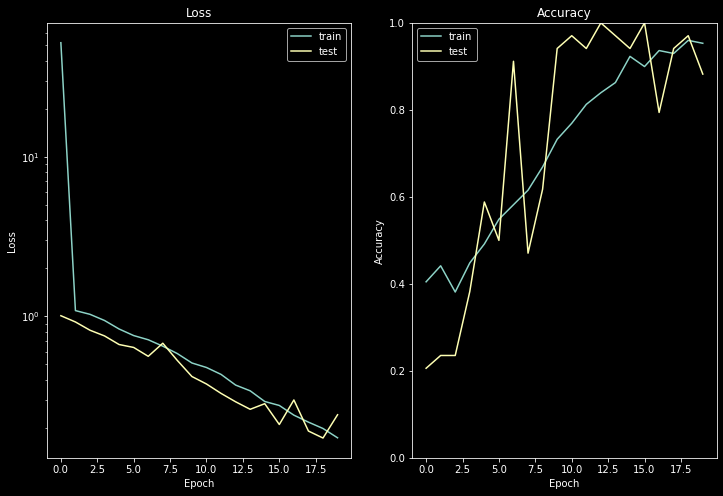

In [20]:
def plot_history(history, validation=False):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,8), sharex=True)
    #fig.tight_layout()
    # plot history for loss
    ax[0].plot(history.history['loss'])
    if validation:
        ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Loss')
    ax[0].set_ylabel('Loss')
    #ax[0].set_ylim(bottom=0.)
    ax[0].set_xlabel('Epoch')
    ax[0].set_yscale("log")
    ax[0].legend(['train', 'test'])
    
    # plot history for F score etc.
    ax[1].plot(history.history['accuracy'])
    if validation:
        ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Accuracy')
    ax[1].set_ylim(bottom=0., top=1.0)
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['train', 'test'])

plot_history(history, validation=True)

As you can see, the test accuracy of the neural network model is better than that of the simple logistic regression classifier.

This is reassuring but not surprising. Even our very simple neural network has the flexibility to learn much more complicated classification surfaces than logisitic regression, so of course it does better than logisitic regression.

And it does hint at one of the dangers of neural networks: overfitting. We've been careful here to hold out a test set and measure performance with that, but it's a small set, and 99% accuracy seems awfully high to me, so I wouldn't be surprised if there was some overfitting going on. You could work on that by adding dropout (which is built in to Keras). That's the neural network equivalent of the regularization our LogisticRegression classifier uses.

But we'll stop here, because a neural network model is overkill for this problem, and worrying about accuracy is not the point of what I've shown you. The point is that using a batteries-included, high-level library like Keras means that we need to write only a little bit more code to build, train, and apply a neural network model than a traditional model.

# What next?

We built an extremely simple feed-forward network model. To experiment more, load the [MNIST database of handwritten digits](http://keras.io/datasets/) and see if you can beat a standard scikit-learn classifier. Unlike the Iris dataset, this is a situation where the power and relative complexity of neural networks is justified. Try it yourself first, but if you get stuck, take a look at [this notebook](https://github.com/wxs/keras-mnist-tutorial/blob/master/MNIST%20in%20Keras.ipynb).

Technical and engineering tutorials for your favourite language or library are easy to find, but if you're interested in some of the more conceptual and mathematical background, take a look at:
 - Michael Nielsen's online textbook "[Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/)" (especially chapters 1, 2 and 3)
 - Weeks 4 and 5 of Andrew Ng's Coursera course "[Machine Learning](https://www.coursera.org/learn/machine-learning)" (you'll have to sign up for the course to access these materials)
 - "[Deep Learning](http://www.nature.com/nature/journal/v521/n7553/abs/nature14539.html)" by Yan Le Cun et al. in Nature (2015) (you can find a [PDF of this article on Google Scholar](https://scholar.google.com/scholar?cluster=5362332738201102290))
 - Chris Olah's [wonderful essays](http://colah.github.io/), particularly the ones on [back propagation](http://colah.github.io/posts/2015-08-Backprop/) (the algorithm with which neural networks are trained) and [recurrent neural networks](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).

Speaking of recurrent neural networks, Keras also has layers that allow you to build models with:

 - convolutional layers, which give state-of-the-art results for computer vsion problems;
 - recurrent layers, which are particularly well suited to modelling language and other sequence data.
 
In fact, one key strength of neural networks (along with sheer predictive power) is their composability. Using a high-level library like Keras, it takes only a few seconds of work to create a very different network. Models can be built up like Lego. Have fun!